In [1]:
import dill
from fall_2021_projection_utils import aggregate_trajs_student_only

In [2]:

from os import listdir
from os.path import isfile, join

path = 'posterior_test_frequency_sims_1638911473/'
files = [join(path, f) for f in listdir(path) if isfile(join(path, f)) and 'omicron' in f]

In [3]:
with open(files[1], "rb") as fhandle:
    sim_info = dill.load(fhandle)

In [4]:
sampled_points = {}
aggregated_trajs = {}
count = 0
for f in files:
    if f in sampled_points:
        continue
    with open(f, "rb") as fhandle:
        [poind_idxs, point, inf_trajs_by_group] = dill.load(fhandle)
        sampled_points[f] = point
        aggregated_trajs[f] = aggregate_trajs_student_only(inf_trajs_by_group)
    count += 1
    if count % 50 == 0:
        print("Loaded {} points".format(count))
        #break

Text(0,0.5,'Final infections')

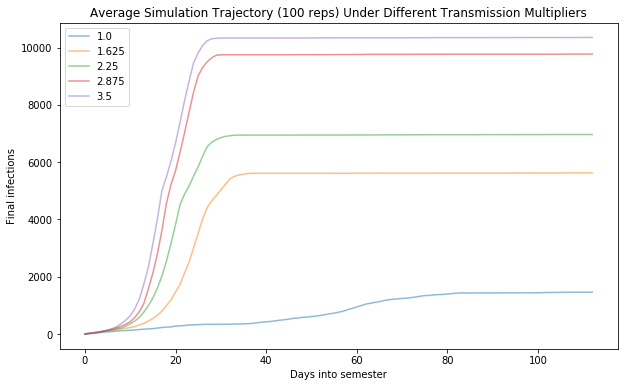

In [5]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

ACTUAL_TRAJ = [2,2,11,23,42,57,55,39,31,48,42,25,29,4,9,8,13,14,8,8,1,7,8,5,3,6,3,0,3,4,9,3,8,1]#,0,0]

def get_number(fname):
    return fname.split('.dill')[0].split('_')[-1]

plt.figure(figsize=(10,6))
fnames = sorted(list(aggregated_trajs.keys()))
for fname in fnames:
    traj = aggregated_trajs[fname]
    traj[0].plot(alpha=0.5, label=get_number(fname))
    
#plt.plot(list(range(len(ACTUAL_TRAJ))), np.cumsum(ACTUAL_TRAJ), color='red', marker='o', label='Fall 2021 Actual Trajectory')
plt.legend(loc='best')
plt.title("Average Simulation Trajectory (100 reps) Under Different Transmission Multipliers")

plt.xlabel('Days into semester')
plt.ylabel('Final infections')

In [36]:
from launch_fall_2021_posterior_sims_v3_contour import load_posterior_df
from fall_2021_projection_utils import UNCERTAINTY_PARAMS

df = load_posterior_df()

In [53]:
low_point_idxs = []
for f, traj in aggregated_trajs.items():
    if list(traj[0])[-1] <= 500:
        low_point_idxs.append(int(f.split('_')[-3]))

In [54]:
len(low_point_idxs)

6

In [55]:
print(low_point_idxs)

[744, 1351, 1552, 1690, 2469, 2490]


In [37]:
high_point_idxs = []
for f, traj in aggregated_trajs.items():
    if list(traj[0])[-1] >= 3000:
        high_point_idxs.append(int(f.split('_')[-3]))

In [39]:
def print_info(idx):
    for param in UNCERTAINTY_PARAMS:
        print("{}: {:.2f}".format(param, df[param].iloc[idx]))
print_info(112)

vax_susc_mult: 0.41
vax_transmission_mult: 0.48
contacts_per_day_mult: 1.86
outside_infection_rate_mult: 3.07
cases_isolated_per_contact_trace: 0.80
initial_ID_prevalence: 0.00


In [43]:
print('\t'.join(UNCERTAINTY_PARAMS))


vax_susc_mult vax_transmission_mult contacts_per_day_mult outside_infection_rate_mult cases_isolated_per_contact_trace initial_ID_prevalence


In [49]:
print('\t'.join(UNCERTAINTY_PARAMS + ['combined_spread_mult'] + ['posterior']))
for idx in high_point_idxs:
    print('\t'.join(["{:.4f}".format(x) for x in df[UNCERTAINTY_PARAMS + ['combined_spread_mult'] + ['posterior']].iloc[idx]]))

vax_susc_mult	vax_transmission_mult	contacts_per_day_mult	outside_infection_rate_mult	cases_isolated_per_contact_trace	initial_ID_prevalence	combined_spread_mult	posterior
0.4082	0.4809	1.8551	3.0733	0.7951	0.0046	0.3641	0.0027
0.3421	0.6035	2.2597	2.1713	0.9713	0.0041	0.4665	0.0007
0.7706	0.2716	1.9026	4.8769	0.9897	0.0047	0.3982	0.0001
0.5867	0.4873	1.7050	3.8981	1.1317	0.0033	0.4874	0.0012
0.3750	0.6373	2.2438	1.5188	1.1561	0.0039	0.5363	0.0004
0.3271	0.7006	1.8883	3.1714	1.0830	0.0044	0.4328	0.0049
0.4082	0.6444	1.9537	3.3970	1.0974	0.0043	0.5139	0.0011


In [52]:
points_list = []
for idx in high_point_idxs:
    points_list.append(list(df[UNCERTAINTY_PARAMS].iloc[idx]))
print(points_list)

[[0.4081771157267468, 0.4808775989126969, 1.8551419314187731, 3.073294444516331, 0.7951453218063828, 0.0046323085300658115], [0.34208513930789164, 0.603490263778672, 2.259694669602522, 2.171331631352255, 0.9713262858023944, 0.004113969271582033], [0.7706463482673553, 0.2715791698837691, 1.9025831105347264, 4.876896538054254, 0.98966448566233, 0.0047008657628938725], [0.5866772199998616, 0.4872683016896559, 1.704958052515231, 3.8981073688722017, 1.131714594283583, 0.00328147331311157], [0.3750401453382676, 0.6373387270580978, 2.243788355598213, 1.5187645050545655, 1.1560631038315707, 0.003919732206092335], [0.32711079324674924, 0.7006094904203879, 1.888299459802121, 3.1714478356092988, 1.083007330990281, 0.004400483520551761], [0.40822197267715055, 0.6443668829572509, 1.9536651049929608, 3.3970433278835848, 1.0973958144435836, 0.004259772039109629]]


In [56]:
points_list = []
for idx in low_point_idxs:
    points_list.append(list(df[UNCERTAINTY_PARAMS].iloc[idx]))
print(points_list)

[[0.3665639640538837, 0.548670556548025, 1.9873057085800532, 3.4522871111748565, 0.9630337969452388, 0.004586124225796668], [0.23553019974106645, 0.6745276452996285, 1.5736014271527003, 3.1273863235748363, 0.6082308756853554, 0.005500147513038874], [0.4551611647731035, 0.3930383491539254, 1.4898289939381253, 4.294916130040846, 0.8373826778517874, 0.00501594231664779], [0.6247481813464292, 0.4687441274901236, 1.1777296789040506, 3.780669069696128, 1.1831599162868722, 0.004714261461631128], [0.3079937614410379, 0.5771159931032617, 2.511234387181125, 3.6132319236979185, 1.4221789742146491, 0.003956259846814769], [0.266951079383427, 0.6902995558127709, 1.9173258913098543, 3.0108934022009595, 1.076997053446863, 0.004679594649661242]]


In [20]:
import numpy as np
t = aggregated_trajs[list(aggregated_trajs.keys())[0]]
type(t)

list

In [21]:
t[0]

0         5.0
1        23.0
2        59.0
3        98.0
4       141.0
        ...  
108    1189.0
109    1191.0
110    1191.0
111    1192.0
112    1193.0
Length: 113, dtype: float64

In [3]:
with open('posterior_point_paths.dill', 'rb') as fhandle:
    posterior_point_paths = dill.load(fhandle)

In [4]:
posterior_df = load_posterior_df()

In [7]:
len(posterior_point_paths) == posterior_df.shape[0] == 106

True

In [8]:
with open(posterior_point_paths[5], 'rb') as fhandle:
    point, inf_trajs_by_group = dill.load(fhandle)

In [9]:
len(inf_trajs_by_group)

100

In [13]:
import numpy as np
student_infxns = np.sum(np.array(inf_trajs_by_group)[:,:-2], axis=1)

In [15]:
student_infxns.shape

(100, 51)

In [10]:
len(inf_trajs_by_group[0])

8